In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
%matplotlib inline
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

global_temp_country = pd.read_csv('2022_APMCM_C_Data.csv', encoding = "ISO-8859-1")

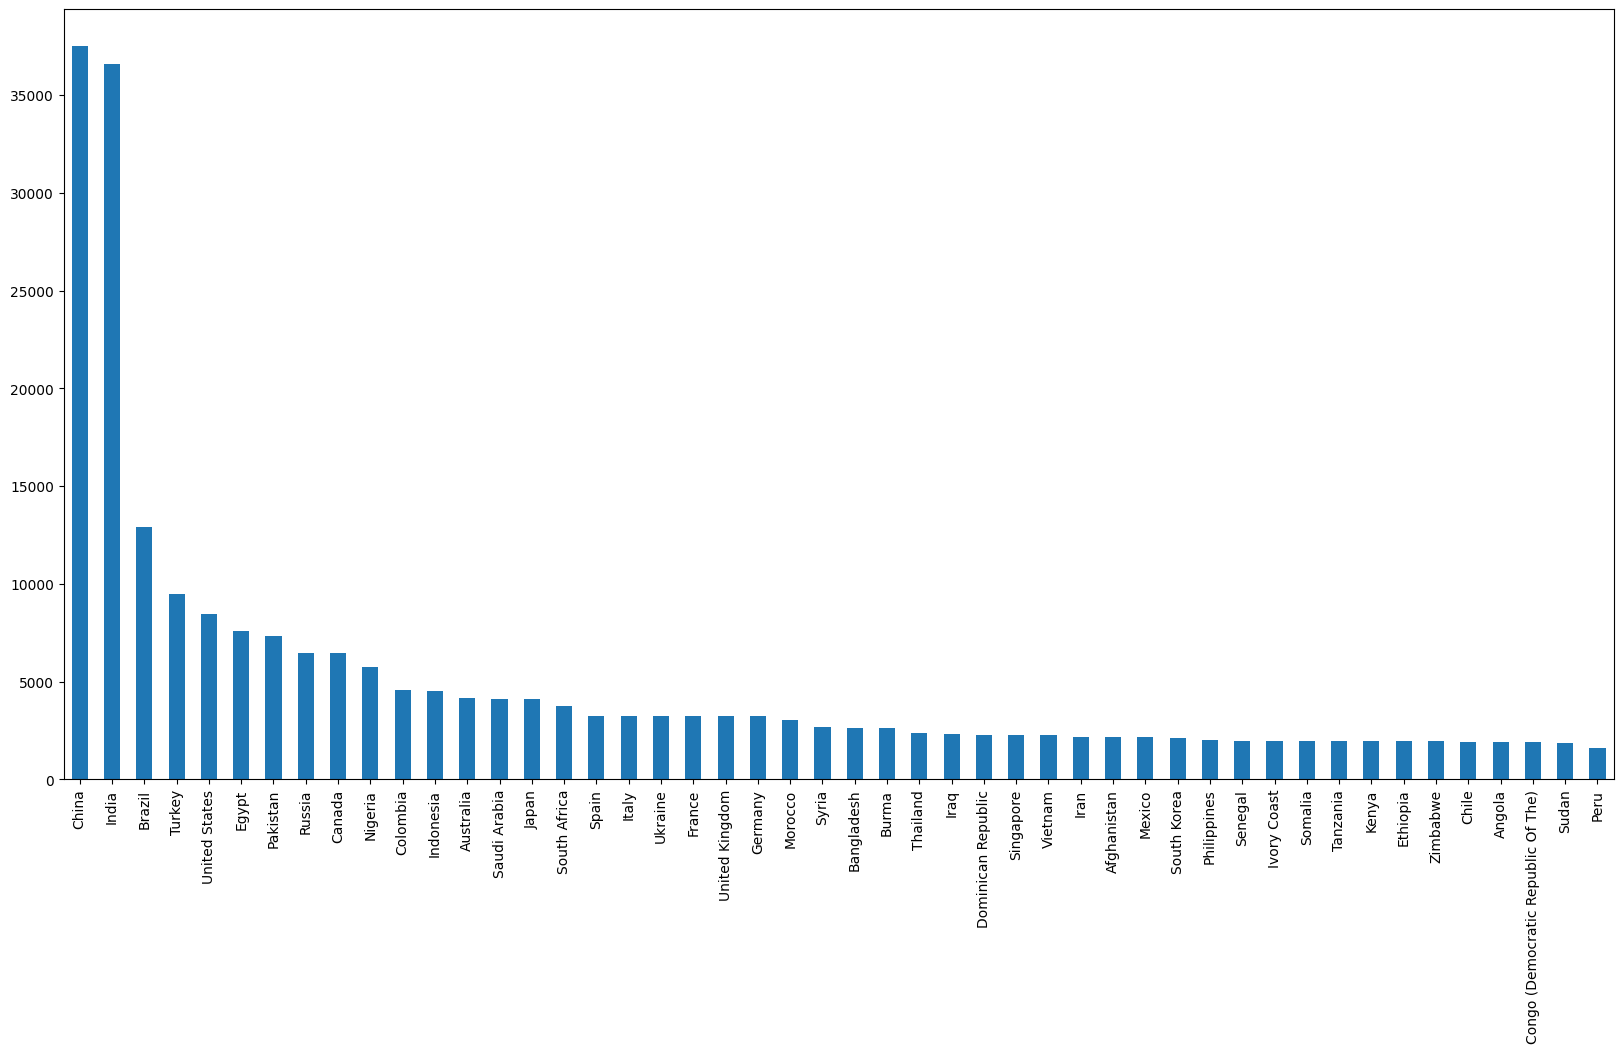

In [5]:
# 数据分析
global_temp_country['Country'].value_counts().plot(kind='bar', figsize=(20,10))
plt.show()

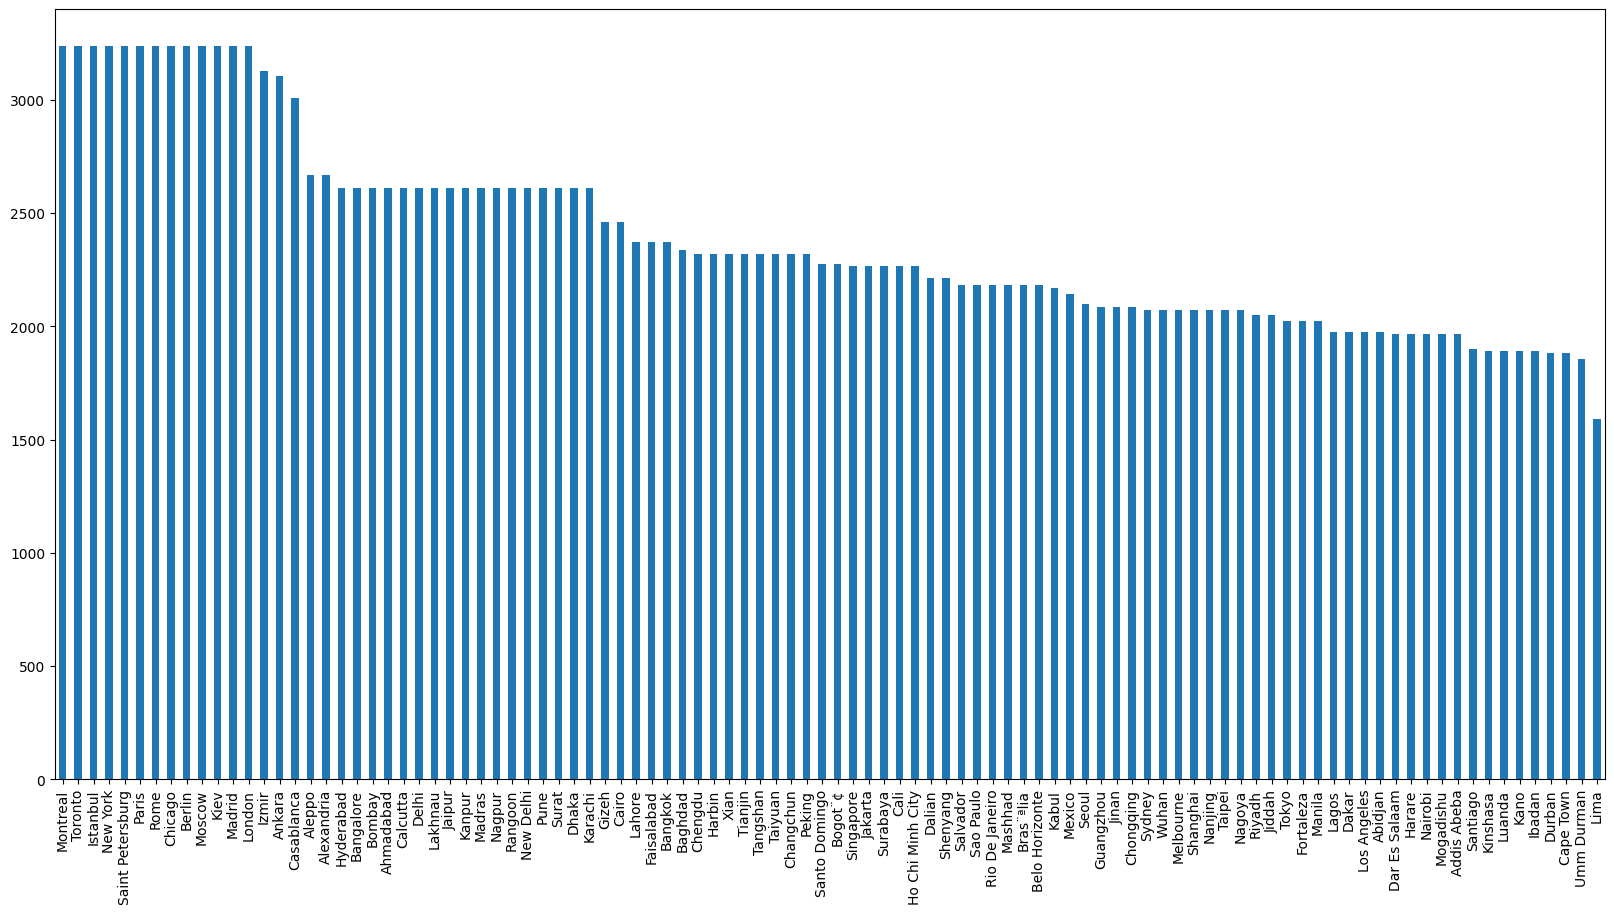

In [19]:
global_temp_country['City'].value_counts().plot(kind='bar', figsize=(20,10))
plt.show()

In [20]:
#Let's remove the duplicated countries (in the analysis, we don't consider the presence of 
#colonies at this the countries) and countries for which no information about the temperature



global_temp_country_clear = global_temp_country.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

#Let's average temperature for each country

countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] == 
                                               country]['AverageTemperature'].mean())


    
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

layout = dict(
    title = 'Average temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

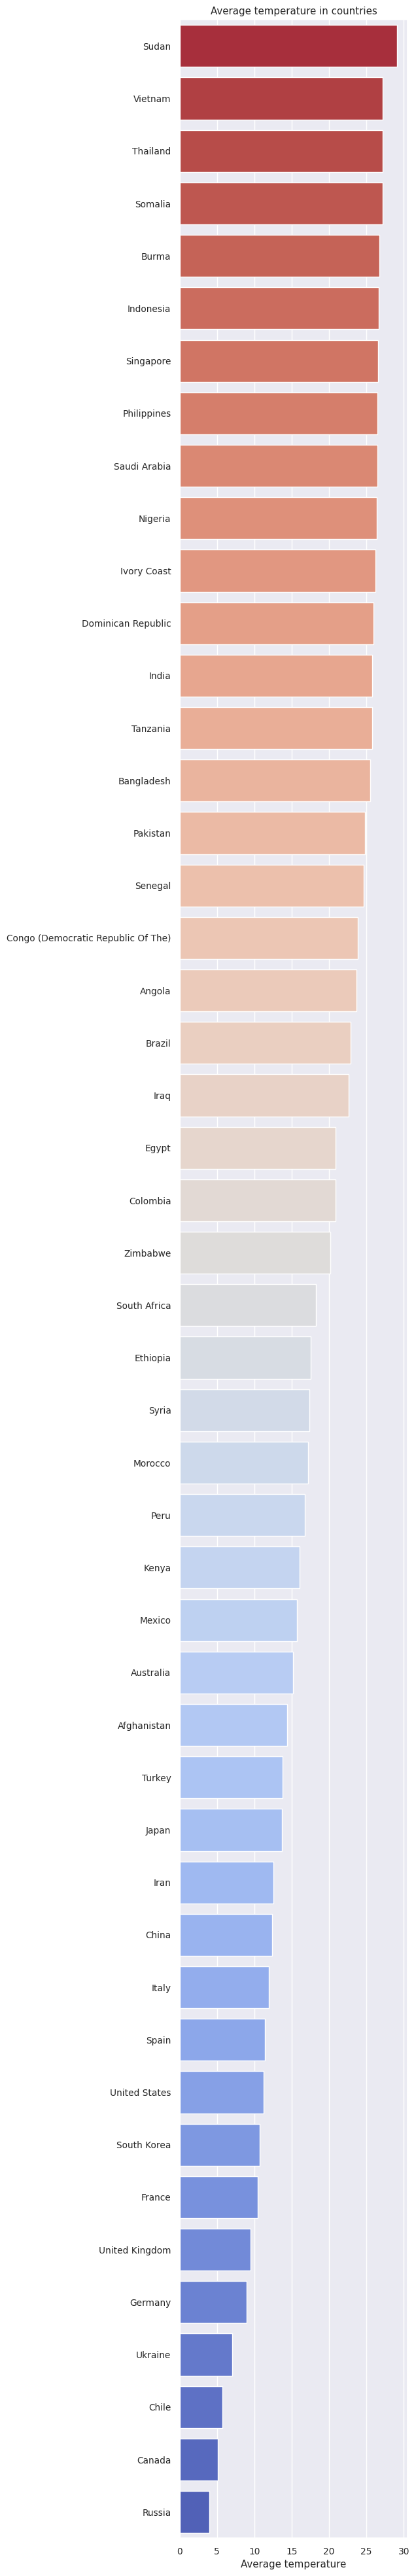

In [21]:
mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries), 
                                                             reverse = True)))
sns.set(font_scale=0.9) 
f, ax = plt.subplots(figsize=(4.5, 50))
colors_cw = sns.color_palette('coolwarm', len(countries))
sns.barplot(x=mean_temp_bar, y=countries_bar, palette = colors_cw[::-1])
Text = ax.set(xlabel='Average temperature', title='Average temperature in countries')

In [22]:
global_temp = pd.read_csv('2022_APMCM_C_Data.csv', encoding = "ISO-8859-1")

#Extract the year from a date
years = np.unique(global_temp['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['AverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp[global_temp['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperatureUncertainty'].mean())

trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average temperature in world',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [23]:
#Extract the year from a date
years = np.unique(global_temp_country_clear['dt'].apply(lambda x: x[:4]))

#Let's create an array and add the values of average temperatures in the countries every 10 years
mean_temp_year_country = [ [0] * len(countries) for i in range(len(years[::10]))]

j = 0
for country in countries:
    all_temp_country = global_temp_country_clear[global_temp_country_clear['Country'] == country]
    i = 0
    for year in years[::10]:
        mean_temp_year_country[i][j] = all_temp_country[all_temp_country['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperature'].mean()
        i +=1
    j += 1

In [24]:
#Let's create a Streaming in Plotly (here, alas, does not work, so commented out)
#stream_tokens = tls.get_credentials_file()['stream_ids']
#token =  stream_tokens[-1]
#stream_id = dict(token=token, maxpoints=60)

data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '',
            title = '# Average\nTemperature,\n°C'),
        #The following line is also needed to create Stream
        #stream = stream_id
            )
       ]

layout = dict(
    title = 'Average temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        type = 'equirectangular'
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='world_temp_map')

In [2]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
import pandas as pd
df = pd.read_csv(
    '2022_APMCM_C_Data.csv',
    encoding='ISO-8859-1',
    parse_dates=["dt"],  # make sure that pandas parses the dates
)
# 删除缺失值所在的行
df = df.dropna()

/root/miniconda3/envs/myenv/lib/python3.9/site-packages/gluonts/json.py:101: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [1]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
import pandas as pd
df = pd.read_csv('GlobalTemperatures.csv',parse_dates=["dt"])
df = df[['dt','LandAverageTemperature']]
# 增加一列，存储id，全部为land
df['id'] = 'land'
df['LandAverageTemperature'].interpolate(method='polynomial', order=5,inplace=True)

/root/miniconda3/envs/myenv/lib/python3.9/site-packages/gluonts/json.py:101: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [2]:
ts_dataframe = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column="id",  # column that contains unique ID of each time series
    timestamp_column="dt",  # column that contains timestamps of each observation
)
ts_dataframe

LandAverageTemperature
item_id timestamp                         
land    1750-01-01                   3.034
        1750-02-01                   3.083
        1750-03-01                   5.626
        1750-04-01                   8.490
        1750-05-01                  11.573
...                                    ...
        2015-08-01                  14.755
        2015-09-01                  12.999
        2015-10-01                  10.801
        2015-11-01                   7.433
        2015-12-01                   5.518

[3192 rows x 1 columns]

In [4]:
static_features = pd.read_csv("2022_APMCM_C_Data.csv", index_col="City", usecols=["City", "Country","Latitude","Longitude"],encoding='ISO-8859-1')
# 删除重复的行
static_features = static_features[~static_features.index.duplicated(keep='first')]
static_features.index.rename("item_id", inplace=True)
ts_dataframe.static_features = static_features
static_features

,Country,Latitude,Longitude
item_id,,,
Kabul,Afghanistan,34.56N,70.05E
Luanda,Angola,8.84S,13.78E
Melbourne,Australia,37.78S,144.41E
Sydney,Australia,34.56S,151.78E
Dhaka,Bangladesh,23.31N,90.00E
...,...,...,...
Chicago,United States,42.59N,87.27W
Los Angeles,United States,34.56N,118.70W
New York,United States,40.99N,74.56W


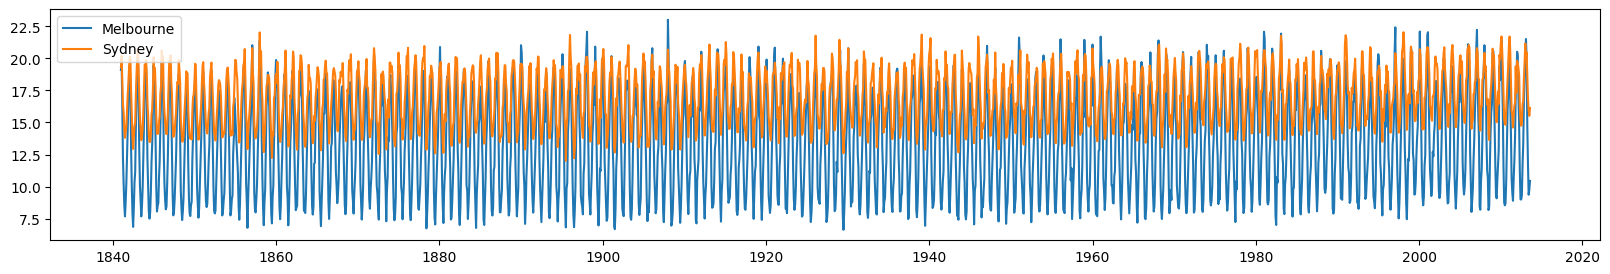

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 3))
for item_id in ["Melbourne", "Sydney"]:
    plt.plot(ts_dataframe.loc[item_id]['AverageTemperature'], label=item_id)
plt.legend();

In [3]:
prediction_length = 1200

test_data = ts_dataframe  # the full data set

# last prediction_length timesteps of each time series are excluded, akin to `x[:-120]`
train_data = ts_dataframe#.slice_by_timestep(slice(None, -prediction_length))

In [10]:
prediction_length = 1200
predictor = TimeSeriesPredictor(
    path="autogluon",
    target="LandAverageTemperature",
    prediction_length=prediction_length,
    eval_metric="mean_wQuantileLoss"
)

predictor.fit(
    train_data,
    presets="high_quality",
)

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Setting presets to: high_quality
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': 'mean_wQuantileLoss',
 'hyperparameter_tune_kwargs': {'num_trials': 5,
                                'scheduler': 'local',
                                'searcher': 'auto'},
 'hyperparameters': 'high_quality',
 'prediction_length': 1200,
 'random_seed': None,
 'target': 'LandAverageTemperature',
 'time_limit': None}
Provided training data set with 3192 rows, 1 items (item = single time series). Average time series length is 3192.0.
Training artifacts will be saved to: /hy-tmp/Enderfga/Ts/autogluon
AutoGluon will save models to autogluon/
AutoGluon will gauge predictive performance using evaluation metric: 'mean_wQuantileLoss'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can be multiplied by -1 to get the metric value.
tuning_data is None. Will 

  0%|          | 0/5 [00:00<?, ?it/s]

ETS/T1 with seasonal = add requires seasonal_period > 1 (received seasonal_period = 1). Disabling seasonality.
ETS/T4 with seasonal = add requires seasonal_period > 1 (received seasonal_period = 1). Disabling seasonality.
Stopping HPO due to exhausted search space: 4 of 4 possible configs ran.
	Trained 4 models while tuning ETS.
	-0.3090       = Validation score (-mean_wQuantileLoss)
	83.99   s     = Total tuning time
Hyperparameter tuning model: Theta. 


  0%|          | 0/5 [00:00<?, ?it/s]

Stopping HPO due to exhausted search space: 2 of 2 possible configs ran.
	Trained 2 models while tuning Theta.
	-2.0035       = Validation score (-mean_wQuantileLoss)
	44.69   s     = Total tuning time
Hyperparameter tuning model: ARIMA. 


  0%|          | 0/5 [00:00<?, ?it/s]

	Trained 5 models while tuning ARIMA.
	-0.2748       = Validation score (-mean_wQuantileLoss)
	6.88    s     = Total tuning time
Hyperparameter tuning model: AutoGluonTabular. 
	invalid frequency
Hyperparameter tuning model: DeepAR. 
	invalid frequency
Hyperparameter tuning model: TemporalFusionTransformerMXNet. 
	Out of bounds nanosecond timestamp: 3742-01-01 00:00:00
Hyperparameter tuning model: SimpleFeedForward. 


In [5]:
path = 'autogluon'
predictor = TimeSeriesPredictor.load(path)

In [6]:
predictor.leaderboard(test_data, silent=True)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,WeightedEnsemble,-1.706881,-1.706881,0.040192,25.820374,12.668774,6
1,SeasonalNaive,-1.706881,-1.706881,0.047919,24.823179,0.003846,2
2,Naive,-1.706881,-1.706881,0.053191,25.820374,0.004673,1
3,ETS,-1.763848,-1.763848,0.035127,22.258844,0.003107,3
4,Theta,-2.003491,-2.003491,0.032842,23.557049,0.003196,4
5,ARIMA,-3.480509,-3.480509,0.034056,22.890184,0.002187,5


In [7]:
predictions = predictor.predict(train_data)
predictions.head()

Model not specified in predict, will default to the model with the best validation score: Naive


mean       0.1       0.2       0.3       0.4    0.5  \
item_id timestamp                                                          
land    2016-01-01  5.518  2.436307  3.494189  4.256996  4.908787  5.518   
        2016-02-01  5.518  1.159828  2.655899  3.734671  4.656443  5.518   
        2016-03-01  5.518  0.180351  2.012656  3.333877  4.462812  5.518   
        2016-04-01  5.518 -0.645386  1.470378  2.995992  4.299574  5.518   
        2016-05-01  5.518 -1.372875  0.992621  2.698310  4.155758  5.518   

                         0.6       0.7        0.8        0.9  
item_id timestamp                                             
land    2016-01-01  6.127213  6.779004   7.541811   8.599693  
        2016-02-01  6.379557  7.301329   8.380101   9.876172  
        2016-03-01  6.573188  7.702123   9.023344  10.855649  
        2016-04-01  6.736426  8.040008   9.565622  11.681386  
        2016-05-01  6.880242  8.337690  10.043379  12.408875

In [8]:
# 一次性只能预测12个月的温度，将生成的预测值继续输入到模型中，进行下一次预测
# 生成的预测值的长度为prediction_length
# 生成的预测值的index为最后一个预测值的index+1
pred = []
predictions = predictor.predict(train_data)
# 将predictions转换为dataframe，再转换为TimeSeriesDataFrame
predictions = pd.DataFrame(predictions)
# mean列重命名为LandAverageTemperature
predictions.rename(columns={'mean':'LandAverageTemperature'},inplace=True)
# 将index转换为列
predictions['index'] = predictions.index
# index列划分为两列，分别为id和dt
predictions['id'] = predictions['index'].apply(lambda x:x[0])
predictions['dt'] = predictions['index'].apply(lambda x:x[1])
ts_dataframe = TimeSeriesDataFrame.from_data_frame(
    predictions,
    id_column="id",  # column that contains unique ID of each time series
    timestamp_column="dt",  # column that contains timestamps of each observation
)

Model not specified in predict, will default to the model with the best validation score: Naive


In [ ]:
pred.append(predictions['LandAverageTemperature'].values)
for i in range(100):
    predictions = predictor.predict(ts_dataframe)
    predictions = pd.DataFrame(predictions)
    predictions.rename(columns={'mean':'LandAverageTemperature'},inplace=True)
    predictions['index'] = predictions.index
    predictions['id'] = predictions['index'].apply(lambda x:x[0])
    predictions['dt'] = predictions['index'].apply(lambda x:x[1])
    ts_dataframe = TimeSeriesDataFrame.from_data_frame(
        predictions,
        id_column="id",  # column that contains unique ID of each time series
        timestamp_column="dt",  # column that contains timestamps of each observation
    )
    pred.append(predictions['LandAverageTemperature'].values)

In [43]:
# 把pred的每个行向量拼接起来，得到一个列向量
import numpy as np
#pred = np.concatenate(pred,axis=0)
# 生成对应的时间序列，从2016-01-01开始，到2116-01-01结束
dt = pd.date_range('2016-01-01','2116-01-01',freq='MS')
# 使用plotly可视化预测未来100年的温度
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['dt'][-120:], y=df['LandAverageTemperature'][-120:], name='LandAverageTemperature'))
fig.add_trace(go.Scatter(x=dt, y=pred, name='Predicted LandAverageTemperature'))
# 增加一根水平线，表示温度为20度
fig.add_shape(type="line", x0=dt[0], y0=20, x1=dt[-1], y1=20, line=dict(color="Red", width=1))
fig.show()